# Math for ML: Advanced Probability

In this lesson I'll continue on with the theory of probability by talking about multivariate probabilities, conditional probabilities, moments, and Bayes Rule. I'll also touch on the two biggest theorems in probability, the Law of Large Numbers and the Central Limit Theorem. Let's get started.

In [13]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from utils.math_ml import *

plt.rcParams['figure.figsize'] = (4, 3)

np.random.seed(0)

In [ ]:
# derive expected value by starting with simple average and turning it into the right form <x> = sum p(i) x(i)

## Multivariate Distributions

### Two Random Variables

In the last lesson we saw the problem of rolling a single die. Suppose now we roll *two* dice. What is the probability that any pair of dots will turn up? One way to think about this problem is to imagine two random variables $x$ and $y$, each representing the roll of each die. Now, let's do just like we did with the single die. Assume you have no other information to go on. What would you guess the probability of rolling any $(x,y)$ pair of values should be? 

If you again employ the principle of indifference, you'd argue as follows: Since $x$ can take on 6 values, and $y$ can also take on 6 values, then the pair $(x,y)$ together can take on $6 \cdot 6 = 36$ possible pairs of values,

$$(x,y) = (1,1), (1,2), \cdots, (1,6), \cdots, (6,1), (6,2), \cdots, (6,6).$$

Thus, each pair of rolls should take an equal probability of $p_{x,y} = \frac{1}{36}$. Let's try to unpack the assumptions here. For one thing, we're assuming each die is fair. That is, the two dice rolled individually should each have equal probabilities $p_x = \frac{1}{6}$ and $p_y = \frac{1}{6}$. But, observe that for each pair of values $x$ and $y$ we have

$$p_{x,y} = \frac{1}{36} = \frac{1}{6} \cdot \frac{1}{6} = p_x \cdot p_y.$$

This is a stronger assumption than assuming the dice are fair. We're also assuming that they don't affect each other at all. Rolling $x$ says nothing about what we'd get from rolling $y$, and vice versa. If this fact weren't true, then we couldn't get a uniform value for all pairs. Some pair would have a different probability.

In probability, this pair of random variables $(x,y)$ is called a **joint random variable**, or a **random vector**. The probability a random vector takes on any two particular particular values, say $x=i$ and $y=j$, is called the **joint probability** of $x$ and $y$, written $\mathbb{Pr}(x=i, y=j)$. The probabilities of each variable acting alone, i.e. $\mathbb{Pr}(x=i)$ and $\mathbb{Pr}(y=j)$, are called the **marginal probabilities**. Instead of saying $x$ and $y$ don't affect each other, we say the two random variables $x$ and $y$ are statistically **independent**. Evidently, if they are independent their joint probability factors into a product of marginal probabilities,

$$\mathbb{Pr}\big(x=i, y=j\big) = \mathbb{Pr}\big(x=i\big) \cdot \mathbb{Pr}\big(y=j\big).$$

Here's an experiment mimicking the rolling of two fair, independent dice. What I'll do is simulate rolling each die 10,000 times by sampling from their "fair die" distributions $x \sim DU(1,7)$ and $y \sim DU(1,7)$ each separately 10,000 times. I'll then use the helper function `plot_joint_histogram` to do the plotting. You can see from the histogram that things do look more or less uniform if we sample each die fairly and independently. Note since each bin should have an expected count of $\frac{10000}{36} \approx 278$, each bin's count can fluctuate within a range of about $278 \pm 17$ and still be uniform.

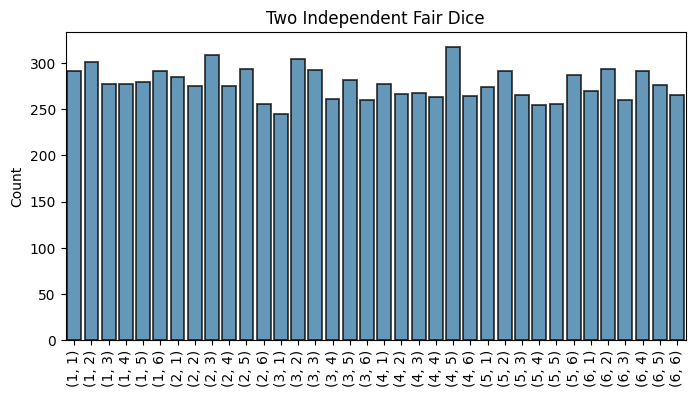

In [80]:
x = np.random.randint(1, 7, size=10000)
y_indep = np.random.randint(1, 7, size=10000)

plot_joint_histogram([x, y_indep], title='Two Independent Fair Dice', figsize=(8,4))

Just as in the univariate case, we can model probabilities of two variables as a ratio of counts per number of trials. If we run $N$ trials (in the above example $N=10000$), and count the number of times $N_{i,j}$ each pair $i,j$ occurs, then the joint probability $\mathbb{Pr}(x=i,y=j)$ is given by the ratio of counts per number of trials as $N \rightarrow \infty$,

$$\mathbb{Pr}\big(x=i,y=j\big) = \lim_{N \rightarrow \infty} \frac{N_{i,j}}{N}.$$

We can then define a **joint distribution** by specifying a PMF of two variables $p(x,y)$. If $x$ and $y$ are independent the joint distribution will factor,

$$p(x,y) = p(x) \cdot p(y).$$

In this example of rolling independent fair dice, since $x, y \sim D(1, 7)$ and $x$ and $y$ are independent, the joint distribution must be of the form 

$$(x,y) \sim DU(1,7) \cdot DU(1,7).$$

This called a **product distribution** since it's just the product of two univariate distributions, in this case each $D(1,7)$.

What if the dice are fair but not independent? Then while each individual roll will be uniform, the pair of dice together won't be. Here's an example. Suppose that the dice were somehow rigged to where die $x$ could "communicate" information to die $y$. Every time $x$ rolls, it will tell $y$ to roll one number higher (mod 6).

|   x   | 1 | 2 | 3 | 4 | 5 | 6 |
|-------|---|---|---|---|---|---|
| **y** | 2 | 3 | 4 | 5 | 6 | 1 |

Let's run a simulation here by again rolling 10,000 times and plotting the histograms, first the marginal histograms, then the joint histogram. To create the given relationship in the table, we can use the formula $y = x \text{ mod } 6 + 1$, i.e. `y = x % 6 + 1`.

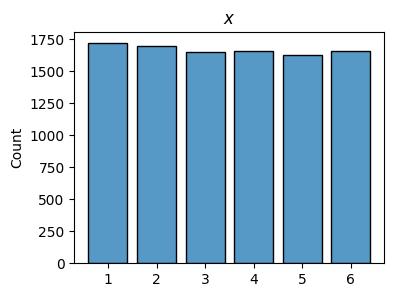

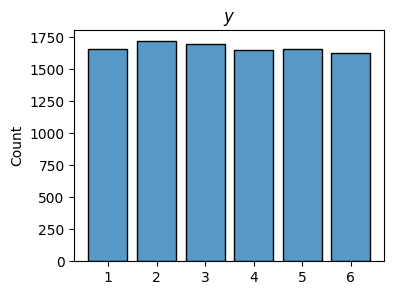

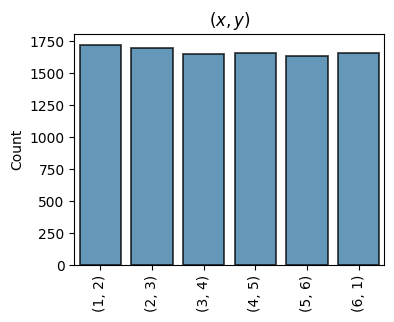

In [81]:
y_dep = x % 6 + 1

plot_histogram(x, is_discrete=True, title='$x$')
plot_histogram(y_dep, is_discrete=True, title='$y$')
plot_joint_histogram([x, y_dep], title='$(x,y)$')

First, plotting the histograms of $x$ and $y$ individually shows each one still looks quite uniform, hence fair. But when plotted together, we see only 6 of the 36 possible pairs ever show up! Why? Because $y$ depends on $x$. Knowing $x$ gives 100% information to reproduce the values of $y$ (and vice versa). Because of this functional dependence, only 6 unique pairs (the size of $x$) are possible. In this case, we say that $x$ and $y$ are **perfectly correlated**.

We can see this more starkly doing a 2D histogram plot, which will plot the counts as a heat map with $x$ on the x-axis and $y$ on the y-axis. The cells that are dark blue indicate a lot of counts occurring there, while the white cells indicate few to no counts occurring. You can see only 6 of the 36 cells are being darkened.

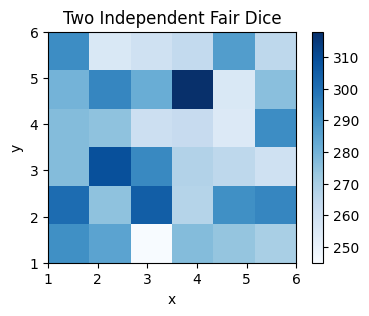

In [82]:
plot_hist2d(x, y_indep, title='Two Independent Fair Dice', bins=(6, 6))

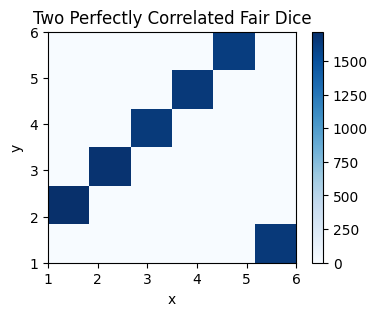

In [83]:
plot_hist2d(x, y_dep, title='Two Perfectly Correlated Fair Dice', bins=(6, 6))

### Conditional Probability

To understand correlation and independence better, it's interesting to look at the ratio of the joint PMF $p(x,y)$ with the marginal PMF $p(x)$. This tells us in a sense how much information is contained in the joint distribution $p(x,y)$ if we already knew what information was in the marginal distribution $p(x)$. 

In the case when both die were independent, $p(x,y)=\frac{1}{36}$ and $p(x)=\frac{1}{6}$ for all $x$ and $y$, so

$$\frac{p(x,y)}{p(x)} = \frac{1/36}{1/6} = \frac{1}{6}.$$

To make a brief aside, we can measure the **information content** of a value $z \sim p(z)$ by defining a function

$$I = \log_2 \frac{1}{p(z)} = -\log_2 p(z).$$

This functions tells us how many bits of information are contained in the value $z$ if it's sampled from $p(z)$. If we average this function over all $z$, it tells us how many bits of information are contained in the entire distribution itself. This is called **entropy**, denoted $H$. I'll talk about entropy more generally in a future lesson. But, when the distribution is uniform (as in our case), the entropy is just $I$ itself, i.e. $H=I$. If $p(z)=\frac{1}{n}$ for all $z$, its entropy is $H = \log_2 n$. That is, we'd need $\log_2 n$ bits of information to specify any given value $x$ sampled from $p(z)$.

We can apply this idea of information to the ratio given above. In that case, it takes $H=\log_2(6) \approx 2.6$ bits of information to specify any given $(x,y)$ pair, assuming we knew $x$. It looks like even if we knew what $x$ is doing, we'd still need $2.6$ more bits to figure out what $y$ is doing. In fact, that's the same number of bits contained in $p(y)$, since $I=\log_2(6) \approx 2.6$. It seems like knowing what $x$ is is telling us basically nothing about what $y$ is.

Let's compare this now with the perfectly correlated case, where $p(x)=\frac{1}{6}$ for all $x$, but

$$
p(x,y) = 
\begin{cases}
\frac{1}{6}, & (x,y) = (1,2), (2,3), (3,4), (4,5), (5,6), (6,1) \\
0, & \text{otherwise}.
\end{cases}
$$

If we take the same ratio again, we'd get

$$
\frac{p(x,y)}{p(x)} = 
\begin{cases}
1, & (x,y) = (1,2), (2,3), (3,4), (4,5), (5,6), (6,1) \\
0, & \text{otherwise}.
\end{cases}
$$

Looking at the entropy of this ratio, we'd need $H=\log_2(1) = 0$ bits of information to specify $(x,y)$ if $x$ was known. That is, knowing what $x$ is is *completely sufficient* to tell us what $y$ is. We don't need to know anything else. We have all the bits we need already by knowing $p(x)$.

Clearly this ratio is important, so we give it a name. We call it the **conditional probability** of $y$, given $x$, written

$$p(y|x) = \frac{p(x,y)}{p(x)}.$$

It's not obvious that this is a valid probability, but it is so long as $p(x) \neq 0$. It's always non-negative, and will sum to one over all $y$ values,

$$\sum_j p(y=j|x) = \sum_j \frac{p(x,y=j)}{p(x)} = \frac{p(x)}{p(x)} = 1.$$

The last equality follows from the fact that we can sum over one variable to get the marginal distribution of the other,

$$p(x) = \sum_j p(x,y=j).$$
$$p(y) = \sum_i p(x=i,y).$$

This is why they're called marginal probabilities, because you're "marginalizing" out the other variables.

The random variable $y|x$ (pronounced "y given x") is different than $y$ or $x$ or $(x,y)$. It's a completely new thing. It's the variable of $y$ values, *assuming* we know what $x$ is already. In our perfectly correlated example, if we know that $x=1$, then $p(y|x=1) = 1$ since we then know for certain that $y=2$. 

In fact, generally $y|x$ won't even have the same distribution as $y$. The only time $y$ and $y|x$ will have the same distribution is if $x$ and $y$ are independent, since in that case $p(x,y)=p(x)p(y)$, so

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x)p(y)}{p(x)} = p(y).$$

When $x$ and $y$ aren't independent, if the come from a joint distribution $p(x,y)$ people often say they're **conditionally independent**, since $y|x$ is *always* independent of $x$ due to the fact that $p(x,y)=p(y|x)p(x)$.

Back to the dice roll example, here's a plot of the histogram for $y|x=1$ in each case, first the independent dice rolls, then the perfectly correlated rolls. The first will contain counts in all 6 bins since $p(y|x)=p(y)$ is uniform. The second will only contain counts in bin 2, since $y=2$ with certainty if $x=1$.

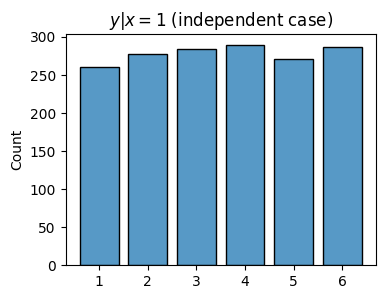

In [6]:
plot_histogram(y_indep[x == 1], is_discrete=True, title='$y|x=1$ (independent case)')

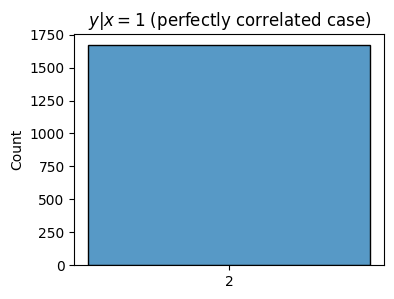

In [7]:
plot_histogram(y_dep[x == 1], is_discrete=True, title='$y|x=1$ (perfectly correlated case)')

### Bayes Rule

Suppose we condition $y$ on the random variable $x$. We just saw the conditional random variable $y|x$ is given by

$$p(y|x) = \frac{p(x,y)}{p(x)}.$$

Notice that we could symmetrically condition $x$ on $y$ instead, and ask about the other conditional random variable $x|y$. In that case, its probability would be given symmetrically by

$$p(x|y) = \frac{p(x,y)}{p(y)}.$$

Let's put both of these together. Using the second equation to write the joint probability as $p(x,y)=p(x|y)p(y)$ and plugging this expression into the first equation, we get

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}.$$

This formula is called **Bayes Rule**. It looks quaint, but don't let that fool you. This is perhaps the most important formula in probability and statistics. Entire machine learning algorithms derive practically from this formula alone.

### $n$ Random Variables

What I just described for two random variables extends to any number of random variables as well. If we have $n$ random variables $x_0,x_1,\cdots,x_{n-1}$, we can define a **random vector** out of them, $\mathbf{x} = (x_0,x_1,\cdots,x_{n-1})$. As a running example, imagine rolling not just two dice, but $n$ dice. Each dice alone can take on one of 6 values, which means a whole random vector of dice can take on $6^n$ tuples of values. The possible outcomes add up fast!

The **joint probability** of these variables can be defined as the ratio of the number of times $n_{i_0,i_1,\cdots,i_{n-1}}$ each tuple of values $(i_0,i_1,\cdots,i_{n-1})$ occurs divided by the total number of trials $N$, as $N \rightarrow \infty$,

$$\mathbb{Pr}(\mathbf{x}=\mathbf{i}) = \mathbb{Pr}(x_0=i_0,x_1=i_1,\cdots,x_{n-1}=i_{n-1}) = \lim_{N \rightarrow \infty} \frac{N_{i_0,i_1,\cdots,i_{n-1}}}{N}.$$

We can also define a **joint distribution** by specifying a probability mass function $p(\mathbf{x}) = p(x_0,x_1,\cdots,x_{n-1})$. Then each probability is given by

$$\mathbb{Pr}(\mathbf{x}=\mathbf{i}) = p(\mathbf{i}) = p(i_0,i_1,\cdots,i_{n-1}).$$

Any distribution gotten by summing over one or more variables is called a **marginal distribution**. We can have $n$ marginal distributions $p_0(x_0), p_1(x_1), \cdots, p_{n-1}(x_{n-1})$, as well as marginals of any *pairs* of random variables $p_{i,j}(x_i,x_j)$, or triplets $p_{i,j,k}(x_i,x_j,x_k)$, etc.

Independence extends as well. Two variables $x_i$ and $x_j$ are **independent** if their bivariate marginal distribution $p_{i,j}(x_i,x_j) = p_i(x_i)p_j(x_j)$. If *all* the variables are independent of each other, we can factor the whole joint distribution into products too,

$$p(x_0,x_1,\cdots,x_{n-1}) = \prod_{i=0}^{n-1} p_i(x_i) = p_0(x_0)p_1(x_1) \cdots p_{n-1}(x_{n-1}).$$

**Notation:** Trying to keep track of all these notations, where each distribution has its own indices, containing variables with the same indices can be a mess. For this reason it's common in practice to omit the subscripts when writing down distributions. So instead of writing $p_i(x_i)$ we'd just write $p(x_i)$, where it's understood by the presence of $x_i$ that we're referring to the distribution $p_i(x_i)$. This usually works fine, but it can be confusing in some cases, for example when multiple random variables come from the same distribution. We'll see this exception below. Outside of those exceptions, assume that each distribution need not be the same.

When dealing with $n$ random variables, the most important cases to know about are:
- When all variables individually come from the same marginal distribution $p(x)$, i.e. $p(x)=p_1(x_1)=\cdots=p_{n-1}(x_{n-1})$. We then say the random variables are **identically distributed**, or **ID** for short. We'd write $x_0,x_1,\cdots,x_{n-1} \sim p(x)$, to make it clear everything is sampled from the same distribution.
- When all variables are independent of each other, in which case $p(x_0,x_1,\cdots,x_{n-1}) = p_0(x_0)p_1(x_1) \cdots p_{n-1}(x_{n-1})$. A shorthand used sometimes to say random variables are all independent is to write $x_0 \perp x_1 \perp \cdots \perp x_{n-1}$, where the symbol $\perp$ means "is independent of".
- When all variables are *both* identically distributed *and* independent. Lacking any creativity, we call such variables **independent, identically distributed**, or **IID** for short. As a short hand, if we sample $n$ variables IID from some distribution $p(x)$, we'd write

$$x_0,x_1,\cdots,x_{n-1} \overset{iid}{\sim} p(x), \quad \text{or just} \quad \mathbf{x} \overset{iid}{\sim} p(x).$$

IID functions have the nice property that their joint distribution factors into a product of marginals that all follow the same distribution,

$$p(x_0,x_1,\cdots,x_{n-1}) = \prod_{i=0}^{n-1} p(x_i) = p(x_0) p(x_1) \cdots p(x_{n-1}),$$

where it's understood each $p(x_i)$ on the right is the same marginal distribution, so $p(x)=p_0(x)=\cdots=p_{n-1}(x)$. This property is really nice because it means all we need to do to find the joint distribution is to find a single marginal distribution. By studying one, we're studying them all.

We can also condition any random variable on one or more other random variables. For example, if we condition $x_{n-1}$ on $x_0,x_1,\cdots,x_{n-2}$, then its conditional distribution is given by

$$p(x_{n-1}|x_0,x_1,\cdots,x_{n-2}) = \frac{p(x_0,x_1,\cdots,x_{n-2},x_{n-1})}{p(x_0,x_1,\cdots,x_{n-2})}.$$

This conditional probability is equivalent to asking, how much information is contained in the joint distribution $p(x_0,x_1,\cdots,x_{n-2},x_{n-1})$ if we already knew the marginal distribution $p(x_0,x_1,\cdots,x_{n-2})$. Equivalently, how much information do the random variables $x_0,x_1,\cdots,x_{n-2}$ give us about the variable $x_{n-1}$.

We can derive the general form of Bayes Rule in a similar way to the bivariate case. For example, if we know what $p(x_0|x_1,\cdots,x_{n-1})$, $p(x_1,\cdots,x_{n-1})$, and $p(x_0)$ are, then we can get $p(x_1,\cdots,x_{n-1}|x_0)$ by taking

$$p(x_1,\cdots,x_{n-1}|x_0) = \frac{p(x_0|x_1,\cdots,x_{n-1}) p(x_1,\cdots,x_{n-1})}{p(x_0)}.$$

I realize this section looks confusing. If you take nothing else away from this section, take away the idea of what IID random variables are. Almost all of machine learning in some way depends on the assumption that data is IID in some way or another. We'll see enough examples as we go that you should start getting somewhat comfortable with joint distributions of $n$ variables. Most of the time they'll be IID.

### Application: The Central Limit Theorem

An interesting application of the use of joint random variables is in considering the sum of $n$ IID Bernoulli random variables. Suppose we sample $n$ times IID from a Bernoulli distribution,

$$x_0,x_1,\cdots,x_{n-1} \overset{iid}{\sim} \text{Ber}(\text{p}).$$

Consider a new random variable $x$ gotten by summing up all these IID Bernoulli variables,

$$x = \sum_{j=0}^{n-1} x_j = x_0 + x_1 + \cdots x_{n-1}.$$

Let's stare at this expression and see what we can already deduce about the sum $x$. Since each $x_i=0,1$, the smallest $x$ can ever be is $0$ (when all $x_i=0$), and the largest it can be is $n$ (when all $x_i=1$), so $x$ must have support $0,1,2,\cdots,n$. Next, let's use the fact that all the $x_i$ are IID and see what that gives us. In this case, the joint distribution is

$$p(x_0,x_1,\cdots,x_{n-1}) = p(x_0)p(x_1) \cdots p(x_{n-1}).$$

Since each $x_i \sim \text{Ber}(\text{p})$, we must then have

$$
\begin{align*}
p(x_0,x_1,\cdots,x_{n-1}) &= p(x_0)p(x_1) \cdots p(x_{n-1}) \\
&= \text{p}^{x_0}(1-\text{p})^{1-x_0} \text{p}^{x_1}(1-\text{p})^{1-x_1} \cdots \text{p}^{x_{n-1}}(1-\text{p})^{1-x_{n-1}} \\
&= \text{p}^{x_0+x_1+\cdots+x_{n-1}} (1-\text{p})^{n-(x_0+x_1+\cdots+x_{n-1})} \\
&= \text{p}^{x} (1-\text{p})^{n-x}.
\end{align*}
$$

You may recall that this expression looks kind of like the expression for the binomial distribution,

$$p(x; n,\text{p}) = \binom{n}{x} \text{p}^{x} (1-\text{p})^{n-x}, \quad \text{where } x=0,1,\cdots,n.$$

Evidently, the joint distribution $p(x_0,x_1,\cdots,x_{n-1})$ pretty much *is* the binomial distribution $p(x; n,\text{p})$. If we just re-normalize each term by summing over all $x=1,2,\cdots,n$ and setting the sum equal to one, we get the same normalizing constants from the binomial distribution, namely the binomial coefficients

$$\binom{n}{x} = \frac{n!}{n!(n-x)!}.$$

We've thus shown that the binomial distribution is just the sum of $n$ IID Bernoulli random variables. IID Bernoulli random variables are often called **Bernoulli trials**. You can think of Bernoulli trials as being equivalent to flipping a (not necessarily fair) coin $n$ times and asking which ones turn up heads. The total number of heads from $n$ coin flips would be given by a binomial distribution $\text{Bin}(n,\text{p})$.

A curious fact is that the binomial distribution *looks like* a Gaussian distribution when $n$ is large and $\text{p}$ isn't too close to 0 or 1. Then,

$$\text{Bin}(n,\text{p}) \approx \mathcal{N}(n\text{p}, n\text{p}(1-\text{p})).$$

That is, the binomial distribution in such cases has an approximate bell-curved shape that's centered around a mean of $n\text{p}$ with a variance of $n\text{p}(1-\text{p})$. 

This is a consequence of the **Central Limit Theorem**. The CLT, which I won't prove, says that if we have $n$ IID random variables all with the same mean $\mu$ and variance $\sigma^2$, then, provided $n$ is large, the distribution of their sum will be approximately a Gaussian,

$$x = \sum_{i=0}^{n-1} x_i \sim \mathcal{N}\bigg(n\mu, n\sigma^2\bigg).$$

In the case of Bernoulli trials, each $x_i$ has mean $\mu=\text{p}$ and variance $\sigma^2=\text{p}(1-\text{p})$, so $x \sim \mathcal{N}(n\text{p}, n\text{p}(1-\text{p}))$. It's kind of weird when you think about it. The CLT is saying *no matter what* distribution we sample from, as long as we sample IID a whole bunch of times, then the sum of those samples will be roughly Gaussian. In fact, the samples need not even be IID, but I won't go into that.

I'll show a quick example of this fact below by sampling from a binomial distribution 10,000 times with parameters $n=1000$ and $\text{p}=0.5$. Notice first how bell-shaped the histogram appears, similar to a Gaussian. Also notice how almost all of the values seem to lie in the range $500 \pm 32$, as you'd expect for a Gaussian distribution with mean $500$ and variance $250$.

Evidently, if you flip a fair coin 10,000 times, the total number of heads would be roughly Gaussian distributed just like this example. Curious, right?

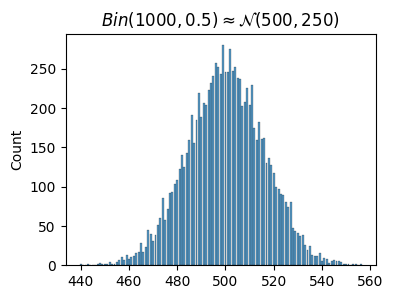

In [12]:
n = 1000
p = 0.5
x = np.random.binomial(n, p, size=10000)
plot_histogram(x, title=f'$Bin({n},{p}) \\approx \mathcal{{N}}({int(n*p)}, {int(n*p*(1-p))})$', is_discrete=True)

### Continuous Multivariate Distributions

All of the common distributions we've covered so far can be extended into the multivariate case. The most useful multivariate extensions for machine learning purposes is the multivariate Gaussian distribution.

**Product Distributions:** $p(x_0,x_1,\cdots) = p_1(x_0)p_1(x_1)\cdots$

**Multivariate Gaussian Distribution:** $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

The multivariate Gaussian distribution, denoted by the symbol $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$, is defined on all of $n$ dimensional space $\mathbb{R}^n$ with density function

$$p(\mathbf{x}) = (2 \pi)^{-n/2} |\boldsymbol{\Sigma}|^{-1/2} \exp\bigg(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\top  \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\bigg),$$

where $\boldsymbol{\mu} \in \mathbb{R}^n$ is an n-dimensional real vector and $\boldsymbol{\Sigma} \in \mathbb{R}^{n \times n}$ is a positive square matrix. The vector $\boldsymbol{\mu}$ is the $n$ dimensional generalization of the mean, which is just a vector of means. The mean of variable $x_i$ is $\mu_i$ for all $i=0,\cdots,n-1$. The matrix $\boldsymbol{\Sigma}$ is called the **covariance matrix**. It's a symmetric, positive matrix that generalizes the notion of variance to $n$ dimensions. Why a matrix? Because each $x_i,x_j$ can have a notion of (co)variance with each other. More on this soon.

Notice the special symbol $|\boldsymbol{\Sigma}|$ in the constant term outside the exponential. It's not important to know what this is. Just consider it a function of $\boldsymbol{\Sigma}$ alone. If you must know, it's the *determinant* of the matrix. The only thing worth knowing is when $\boldsymbol{\Sigma}$ is diagonal, $|\boldsymbol{\Sigma}|$ is the product of the diagonal elements, which I'll use below.

Note the exponent term is really just a sum of a bunch of scalar terms when expanded out,
$$(\mathbf{x}-\boldsymbol{\mu})^\top  \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} (x_i - \mu_i) \cdot \Sigma_{i,j}^{-1} \cdot (x_j - \mu_j),$$
hence the exponent is really just the sum of a bunch of quadratic terms, reminiscent of the univariate Gaussian.

In the special case when the covariance matrix $\boldsymbol{\Sigma}$ is diagonal, we say the random variables $x_0,x_1,\cdots,x_{n-1}$ are **uncorrelated**. Suppose
$$\boldsymbol{\Sigma} = \text{diag}(\sigma_0^2, \sigma_2^2, \cdots, \sigma_{n-1}^2).$$
You can pretty easily verify that its inverse is simply the reciprocals of the diagonal terms,
$$\boldsymbol{\Sigma}^{-1} = \text{diag}\bigg(\frac{1}{\sigma_0^2}, \frac{1}{\sigma_1^2}, \cdots, \frac{1}{\sigma_{n-1}^2}\bigg).$$
This makes the complicated looking exponent term reduce to a simple sum of squares. Using the fact $|\boldsymbol{\Sigma}|=\sigma_0\sigma_1\cdots\sigma_{n-1}$ as well, we get

$$
\begin{align*}
p(\mathbf{x}) &= \frac{1}{\sqrt{2 \pi \sigma_0 \sigma_1 \cdots \sigma_{n-1}}} \exp\bigg(-\frac{1}{2} \sum_{i=0}^{n-1} \frac{(x_i - \mu_i)^2}{\sigma_i^2} \bigg) \\
&= \Bigg(\frac{1}{\sqrt{2 \pi \sigma_0^2}} \exp{\bigg(-\frac{(x_0 - \mu_0)^2}{2\sigma_0^2}\bigg)} \Bigg) \cdots \Bigg(\frac{1}{\sqrt{2 \pi \sigma_{n-1}^2}} \exp{\bigg(-\frac{(x_{n-1} - \mu_{n-1})^2}{2\sigma_{n-1}^2}\bigg)} \Bigg) \\
&= p(x_0) p(x_1) \cdots p(x_{n-1}).
\end{align*}
$$

That is, the joint distribution $p(\mathbf{x})$ factors into a product of marginal Gaussian distributions $p(x_0) p(x_1) \cdots p(x_{n-1})$. This means that the variables $x_0,x_1,\cdots,x_{n-1}$ must be independent if they're uncorrelated. In the further special case where $\mu_i=\mu$ and $\sigma_i^2=\sigma^2$ for all $i$, they're also IID.

This distribution is so important to machine learning that it's worth taking some time to visualize it, as a surface in 3D space, as a set of contours, as 3D histogram, and as a heat map. Let's start with the first two. Suppose our random variable $\mathbf{x}=(x,y)$ is 2D. I'm going to plot the surface of the density function $p(x,y)$ as well as the contour plot side-by-side using a helper function `plot_multivariate_normal`. This function will take in the mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ and plot what the distribution looks like for that pair of parameters.

Let's define $\boldsymbol{\mu}=(\mu_x, \mu_y)$ and
$\boldsymbol{\Sigma} = 
\begin{pmatrix}
\sigma_x^2 & \sigma_{x,y} \\
\sigma_{x,y} & \sigma_y^2
\end{pmatrix}.$ A few things to notice:
- Changing $\boldsymbol{\mu}$ just changes where the density is centered. It doesn't change the shape.
- Changing $\sigma_x^2$ or $\sigma_y^2$ changes how much the density spreads in that direction. If they're equal the density will be perfectly circular. If one is greater than the other the density will become elliptical. In the limit one becomes much much greater than the other, the density will essentially just become a univariate Gaussian.
- Making $\sigma_{x,y}$ non-zero makes the density change its angle in the xy-plane. That's what introducing correlation essentially does geometrically. 
- Making $\sigma_{x,y}=0$ means that $x$ and $y$ become independent as I showed above. Geometrically, independence essentially rotates until the density is aligned along the axes themselves.

Feel free to play around with different choices of parameters and see how it affects the densities.

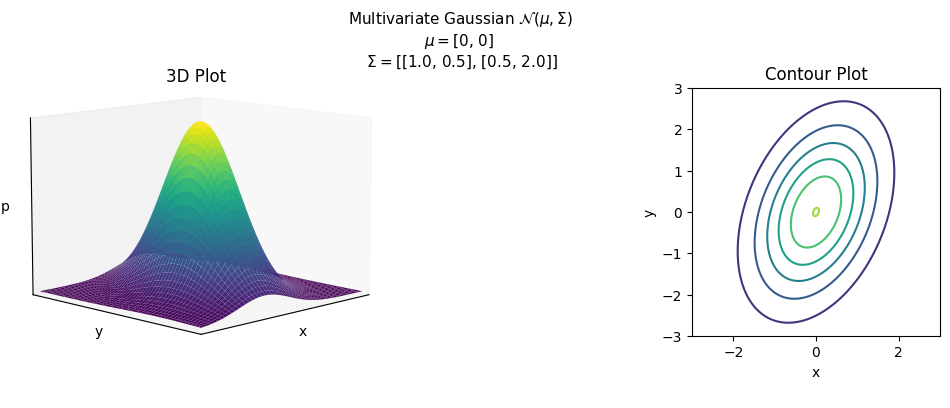

In [9]:
mu = np.array([0, 0])
Sigma = np.array([[1, 0.5], [0.5, 2]])
plot_multivariate_gaussian(mu, Sigma, elev=10, azim=45)

We can also of course plot the histograms. Suppose we sample a bunch of points $(x,y) \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ a bunch of times and plot the histogram. We can do this in python by again using `np.random.randn`, but passing in a shape $(m,n)$ instead of a single number.

When $n=2$ we can plot the histogram in 3D space. I'll plot the standard 2D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{I})$, which has mean zero and identity covariance. It's the multivariate generalization of the standard $\mathcal{N}(0,1)$ Gaussian. I'm using another helper function called `plot_3d_hist` here to hide a lot of ugly code.

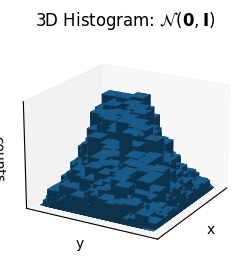

In [10]:
X = np.random.randn(10000, 2)
x, y = X[:, 0], X[:, 1]
plot_3d_hist(x, y, bins=30, xlim=(-2, 2), ylim=(-2, 2), elev=20, azim=30, 
             title='3D Histogram: $\mathcal{N}(\mathbf{0}, \mathbf{I})$')

Finally, we can view the same histogram contour-style using what's called a **heat map**. A heat map is a way of plotting one variable that depends on 2 others, e.g. $p(x,y)$ vs $x$ and $y$. In each grid of the plot the color indicates how "hot" the dependent variable is. The higher the counts in a given bin, the hotter the heat map will look at that bin. We can plot a histogram-style heatmap in matplotlib using `plt.hist2d`. Heat maps are very useful ways of visualizing data like this, usually more so than janky 3D plots like the one above.

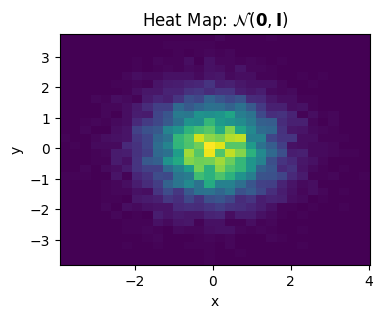

In [11]:
plt.hist2d(x, y, bins=30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heat Map: $\mathcal{N}(\mathbf{0}, \mathbf{I})$')
plt.show()

In [ ]:
# add product distributions, multivariate laplace, one-hot categorical, multinomial